# <a id='toc1_'></a>[Mobile Robotics Project Report](#toc0_)

---
Marcus Cemes, Pable Paller, Adrien Pannatier,  Carolina Rodrigues Fidalgo


<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    This notebook describes the different parts of our project for the course micro-452: Basics of mobile robotics.<br/>
    In the following cells we will describe how the modules work and give a structure to run the project.
</div>

**Table of contents**<a id='toc0_'></a>    
- [Mobile Robotics Project Report](#toc1_)    
  - [Run requirements](#toc1_1_)    
  - [Add the modules to path](#toc1_2_)    
  - [Vision](#toc1_3_)    
  - [Filtering](#toc1_4_)    
    - [Prediction](#toc1_4_1_)    
    - [Update](#toc1_4_2_)    
  - [Global navigation](#toc1_5_)    
  - [Big Brain](#toc1_6_)    
  - [Motion control](#toc1_7_)    
  - [Local navigation](#toc1_8_)    
  - [Running the program as a whole](#toc1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Run requirements](#toc0_)

All instructions to run the project are to be found in the [readme](README.md)


## <a id='toc1_2_'></a>[Add the modules to path](#toc0_)

The following trickery adds our Python module to the Jupyter environment.

In [1]:
from sys import path
path.append("./app")
path.append("./report")

One of the main structures of our project is the context. Created to be shared between the modules, the context holds the following data:<br/>

<span style="text-decoration:underline;font-weight:bold;">[Context Class](app/context.py)</span>
- <strong>node</strong>: node of the main thymio
- <strong>node_top</strong>: node of the top thymio
- <strong>pool</strong>: necessary part to allow multiple threading in python
- <strong>state</strong>: state containing all the necessary elements to describe the scene
- <strong>scene_update</strong>: signaling of scene update from vision
- <strong>pose_update</strong>: signaling position update from filtering
- <strong>debug_update</strong>: boolean to allow debugging vision display in the ui

Let us create this context

In [2]:
from app.context import Context
from app.state import State
from report.map import Map_obj
from report.report_functions import *


ctx = Context(node=None, node_top=None, pool=None, state=State())

map_scene = Map_obj(ctx)
map_scene.map_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

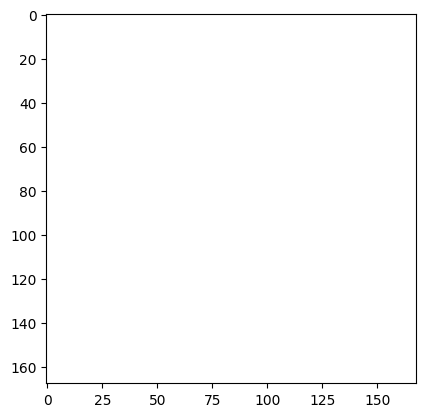

In [3]:
map_scene.display_map()

The [State Class](app/state.py) holds the necessary information on the thymio to allow the correct progression of the robot.</br>
State also contains the elements needed by the ui interface to display the scene. 

We can now import modules and show how they work!

## <a id='toc1_3_'></a>[Vision](#toc0_)

In [ ]:
from app.vision import Vision
vision = Vision(ctx, external=False, live=False, image_path="assets/test_frame_01.jpg")

In [ ]:
from app.utils.types import Vec2
import math

def angle(p1: Vec2, p2: Vec2) -> float:
    """Returns the angle of the vector between two points in radians."""

    return math.atan2(p2[1]-p1[1], p2[0]-p1[0])

In [ ]:
vision.calibrate()

In [ ]:
obs = vision.next()

In [ ]:
vision_pose = (obs.back[0], obs.back[1], angle(obs.back, obs.front))
print(vision_pose)

## <a id='toc1_4_'></a>[Filtering](#toc0_)

In [4]:
from app.filtering import Filtering
#creation of the filter
filtering = Filtering(ctx)
stop_movement_simulation(filtering)

In [5]:
# def print_pose():
#     global sposition, sorientation
#     sposition = ctx.state.position
#     sorientation = ctx.state.orientation
#     print(f"position of the thymio: {sposition}")
#     print(f"orientation: {sorientation}")

### <a id='toc1_4_1_'></a>[Prediction](#toc0_)

In [6]:
stop_movement_simulation(filtering)

Let's take a look at our current position.

In [7]:
print_pose(ctx)

position of the thymio: (60.0, 60.0)
orientation: -3.141592566167013


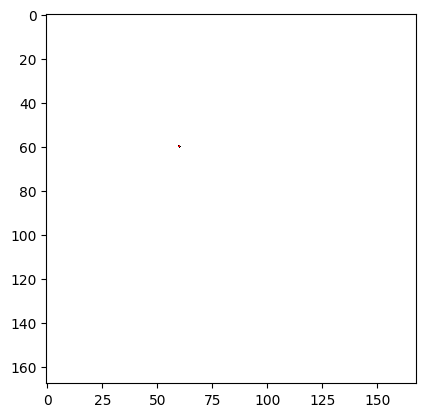

In [8]:
map_scene.update_map()

To execute a filtering step:

In [ ]:
filtering.process_event({"motor.left.speed": [50], "motor.right.speed": [50]})

The state should now be updated?

In [ ]:
print_pose(ctx)
stop_movement_simulation(filtering)

Let's do it again turning the robot

In [ ]:
filtering.process_event({"motor.left.speed": [50], "motor.right.speed": [-50]})
print_pose(ctx)
stop_movement_simulation(filtering)

we see that filtering is correctly predicting the progression of the simulated robot

### <a id='toc1_4_2_'></a>[Update](#toc0_)

now to display the update function, we use the image and position of the robot given by the [Vision module](#toc1_3_)   

The position after our prediction step is:

In [ ]:
print_pose(ctx)

now we update the position with the one given by vision

In [ ]:
vision_position = vision #get image from vision
filtering.update(vision_pose)

after the vision update, the new position is:

In [ ]:
print_pose(ctx)

## <a id='toc1_5_'></a>[Global navigation](#toc0_)

## <a id='toc1_6_'></a>[Big Brain](#toc0_)

## <a id='toc1_7_'></a>[Motion control](#toc0_)

## <a id='toc1_8_'></a>[Local navigation](#toc0_)

## <a id='toc1_9_'></a>[Running the program as a whole](#toc0_)

now that we went through all the main modules we can run the app containing the project

In [ ]:
!python -m app